In [1]:
library("readr")
library("readxl")
library("ggplot2")

Warning message:
"il pacchetto 'ggplot2' è stato creato con R versione 4.4.3"


In [2]:
dataset1 <- read_excel("C:/Users/readytouse/Desktop/Magistrale/banking/project_3/general_dataset.xlsx")
head(dataset1)

DATE,TIME PERIOD,Austria_corp_ir,Austria_hh_ir,Belgium_corp_ir,Belgium_hh_ir,Germany_corp_ir,Germany_hh_ir,Estonia_corp_ir,Estonia_hh_ir,⋯,DFR,MRO,MLF,euro_area_TL,less_dev_corp_ir,less_dev_hh_ir,dev_corp_ir,dev_hh_ir,high_dev_corp_ir,high_dev_hh_ir
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2005-01-31,2005Jan,3.46,3.78,3.85,3.88,4.08,4.48,4.26,3.46,⋯,1,2,3,3169582,4.213333,4.283333,3.750,3.520,3.66875,3.72875
2005-02-28,2005Feb,3.50,3.60,3.64,3.83,4.10,4.41,5.17,3.48,⋯,1,2,3,3173060,4.616667,4.206667,3.780,3.510,3.66500,3.68750
2005-03-31,2005Mar,3.50,3.59,3.79,3.79,4.01,4.40,4.62,3.32,⋯,1,2,3,3189366,4.326667,4.083333,3.790,3.485,3.63250,3.68625
2005-04-30,2005Apr,3.50,3.47,3.49,3.76,3.93,4.42,4.26,3.07,⋯,1,2,3,3215310,4.263333,4.010000,3.815,3.490,3.57875,3.65125
2005-05-31,2005May,3.47,3.54,3.22,3.68,3.89,4.32,4.40,3.13,⋯,1,2,3,3234313,4.286667,4.073333,3.800,3.480,3.53375,3.62500
2005-06-30,2005Jun,3.44,3.52,3.31,3.60,3.94,4.20,3.82,3.15,⋯,1,2,3,3283311,4.016667,4.013333,3.660,3.430,3.53750,3.57625


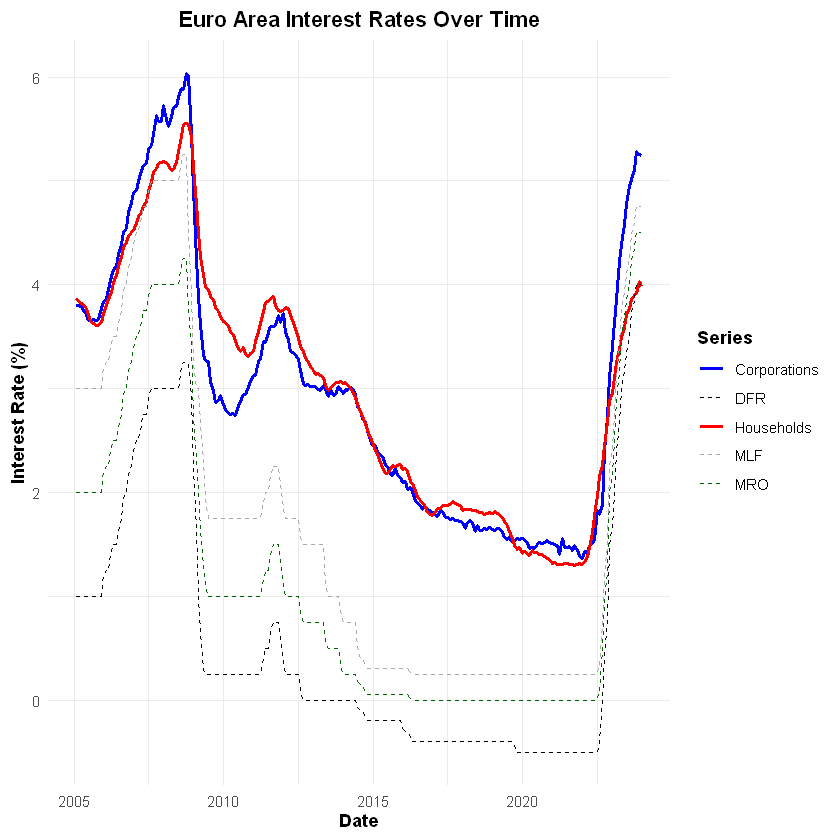

In [3]:
ggplot(dataset1, aes(x = DATE)) +
  geom_line(aes(y = euro_area_corp_ir, color = "Corporations", linetype = "Corporations"), linewidth = 1) +
  geom_line(aes(y = euro_area_hh_ir, color = "Households", linetype = "Households"), linewidth = 1) +
  geom_line(aes(y = DFR, color = "DFR", linetype = "DFR"), linewidth = 0.4) +
  geom_line(aes(y = MLF, color = "MLF", linetype = "MLF"), linewidth = 0.4) +
  geom_line(aes(y = MRO, color = "MRO", linetype = "MRO"), linewidth = 0.4) +

  labs(
    title = "Euro Area Interest Rates Over Time",
    x = "Date",
    y = "Interest Rate (%)",
    color = "Series",
    linetype = "Series"
  ) +
  scale_color_manual(values = c(
    "Corporations" = "blue",
    "Households" = "red",
    "DFR" = "black",
    "MLF" = "darkgray",
    "MRO" = "darkgreen"
  )) +
  scale_linetype_manual(values = c(
    "Corporations" = "solid",
    "Households" = "solid",
    "DFR" = "dashed",
    "MLF" = "dashed",
    "MRO" = "dashed"
  )) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

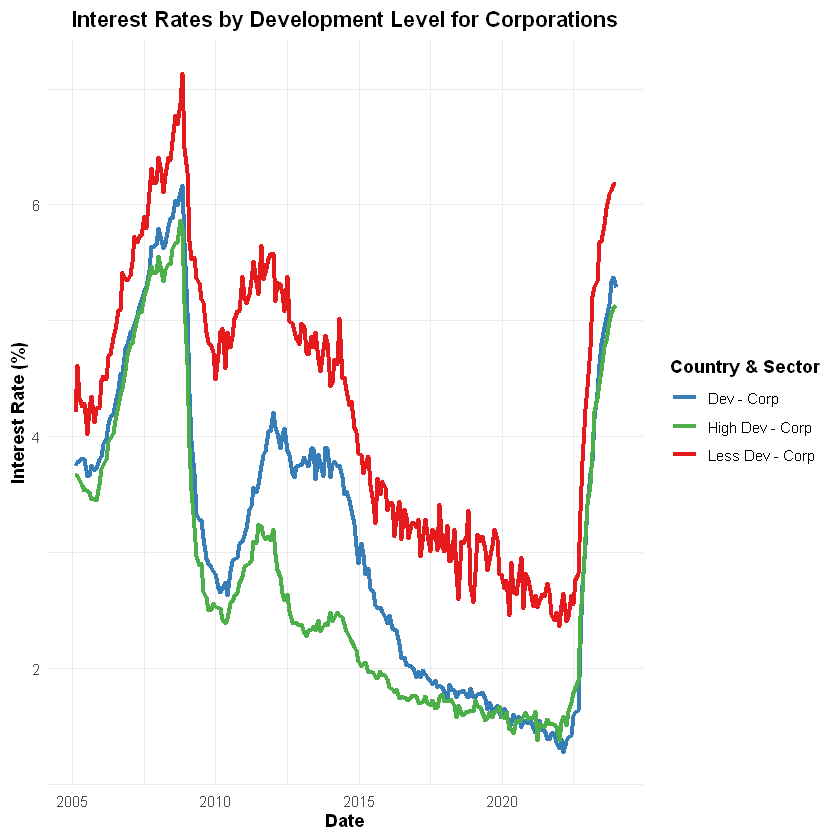

In [4]:
ggplot(dataset1, aes(x = DATE)) +
  # Less developed (reds)
  geom_line(aes(y = less_dev_corp_ir, color = "Less Dev - Corp"), linewidth = 1.2) +

  # Developed (blues)
  geom_line(aes(y = dev_corp_ir, color = "Dev - Corp"), linewidth = 1.2) +

  # Highly developed (greens)
  geom_line(aes(y = high_dev_corp_ir, color = "High Dev - Corp"), linewidth = 1.2) +

  labs(
    title = "Interest Rates by Development Level for Corporations",
    x = "Date",
    y = "Interest Rate (%)",
    color = "Country & Sector"
  ) +
  scale_color_manual(values = c(
    "Less Dev - Corp" = "#e41a1c",
    "Dev - Corp"      = "#377eb8",
    "High Dev - Corp" = "#4daf4a"
  )) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

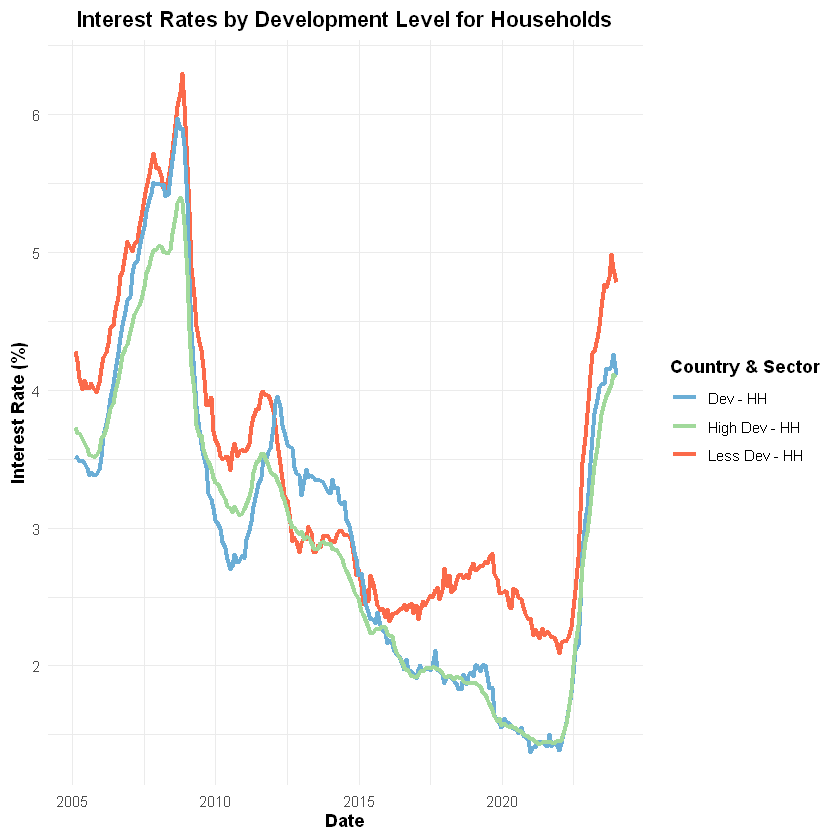

In [5]:
ggplot(dataset1, aes(x = DATE)) +
  # Less developed (reds)
  geom_line(aes(y = less_dev_hh_ir, color = "Less Dev - HH"), linewidth = 1.2) +

  # Developed (blues)
  geom_line(aes(y = dev_hh_ir, color = "Dev - HH"), linewidth = 1.2) +

  # Highly developed (greens)
  geom_line(aes(y = high_dev_hh_ir, color = "High Dev - HH"), linewidth = 1.2) +

  labs(
    title = "Interest Rates by Development Level for Households",
    x = "Date",
    y = "Interest Rate (%)",
    color = "Country & Sector"
  ) +
  scale_color_manual(values = c(
    "Less Dev - HH"   = "#fb6a4a",
    "Dev - HH"        = "#6baed6",
    "High Dev - HH"   = "#a1d99b"
  )) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

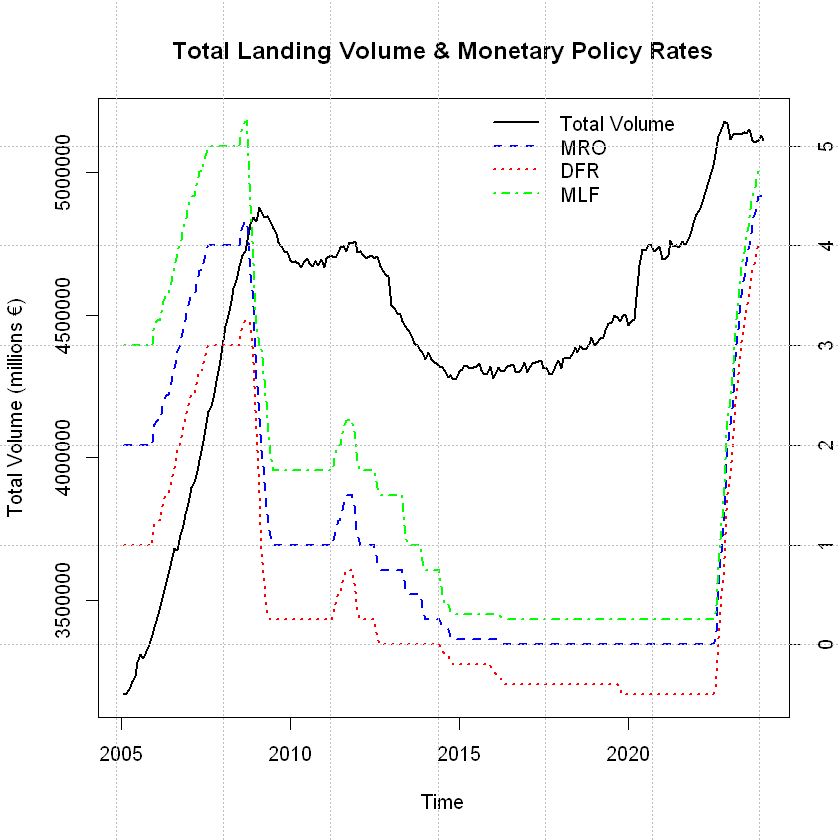

In [6]:
# Set up first plot: Total Volume on left y-axis
plot(dataset1$DATE, dataset1$euro_area_TL, type = "l", col = "black", lwd = 2,
     xlab = "Time", ylab = "Total Volume (millions €)",
     ylim = range(dataset1$euro_area_TL, na.rm = TRUE),
     main = "Total Landing Volume & Monetary Policy Rates")

# Add second plot (rates) on right y-axis
par(new = TRUE)
rate_range <- range(c(dataset1$DFR, dataset1$MRO, dataset1$MLF), na.rm = TRUE)

plot(dataset1$DATE, dataset1$MRO, type = "n", axes = FALSE, xlab = "", ylab = "",
     ylim = rate_range)

# Add lines for rates
lines(dataset1$DATE, dataset1$MRO, col = "blue", lwd = 2, lty = 2)
lines(dataset1$DATE, dataset1$DFR, col = "red", lwd = 2, lty = 3)
lines(dataset1$DATE, dataset1$MLF, col = "green", lwd = 2, lty = 4)

# Add right y-axis
axis(side = 4)
mtext("Rates (%)", side = 4, line = 3)

# Optional: vertical line for event
abline(v = as.Date("2022-07-01"), col = "black", lty = 3, lwd = 2)

# Add legend

par(mar = c(5, 4, 4, 8), xpd = TRUE) 
legend("topright",
       inset = c(0.15, 0),   # Push legend outside plot
       legend = c("Total Volume", "MRO", "DFR", "MLF"),
       col = c("black", "blue", "red", "green"),
       lty = c(1, 2, 3, 4),
       lwd = 2,
       xpd = TRUE,
       bty = "n")    

# Optional: grid
grid(col = "gray", lty = 3)